In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving synthetic_and_real_mutation_data.csv to synthetic_and_real_mutation_data.csv


In [ ]:
# Read the dataset
df = pd.read_csv('synthetic_and_real_mutation_data.csv')
df

,Gene,MutationType,PolyPhen2_Score,SIFT_Score,Conservation_Score,AlleleFrequency,MobilitySeverity,Source
0,TPM2,Missense,0.96,0.01,0.95,0.00001,1,Liu2018
1,PIEZO2,Missense,0.88,0.06,0.91,0.00002,0,Liu2018
2,TPM2,Nonsense,0.84,0.26,0.82,0.00216,0,Synthetic Data
3,TPM2,Nonsense,0.56,0.18,0.92,0.00155,0,Synthetic Data
4,TNNT3,Missense,0.76,0.29,0.86,0.00098,0,Synthetic Data
...,...,...,...,...,...,...,...,...
497,TNNT3,Missense,0.63,0.57,0.86,0.00013,0,Synthetic Data
498,PIEZO2,Nonsense,0.68,0.25,0.61,0.00052,0,Synthetic Data
499,PIEZO2,Nonsense,0.90,0.10,0.70,0.00580,0,Synthetic Data
500,TNNT3,Nonsense,0.66,0.27,0.77,0.00019,0,Synthetic Data


In [ ]:
# Shape of the dataset
df.shape

(502, 8)

Examine the columns

In [ ]:
# Check to see if the dataset is ready for analysis
df.describe()

,PolyPhen2_Score,SIFT_Score,Conservation_Score,AlleleFrequency,MobilitySeverity
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,0.717550,0.283406,0.809661,0.001071,0.003984
std,0.149992,0.155064,0.113713,0.001151,0.063056
min,0.140000,0.010000,0.600000,0.000000,0.000000
25%,0.630000,0.170000,0.712500,0.000270,0.000000
50%,0.730000,0.270000,0.810000,0.000690,0.000000
75%,0.830000,0.380000,0.910000,0.001437,0.000000
max,1.000000,0.830000,1.000000,0.008960,1.000000


Within this dataset, there is an outlier. The outlier is the AlleleFrequency column. The mean of the column is 0.001071. The 75th percentile is 0.001437. The maximum is 0.00896, which means that it is > 6 than the 75th percentile.

Dealing with missing values

In [ ]:
df.isnull().sum()

,0
Gene,0
MutationType,0
PolyPhen2_Score,0
SIFT_Score,0
Conservation_Score,0
AlleleFrequency,0
MobilitySeverity,0
Source,0


There are no missing values.

Categorical Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gene                502 non-null    object 
 1   MutationType        502 non-null    object 
 2   PolyPhen2_Score     502 non-null    float64
 3   SIFT_Score          502 non-null    float64
 4   Conservation_Score  502 non-null    float64
 5   AlleleFrequency     502 non-null    float64
 6   MobilitySeverity    502 non-null    int64  
 7   Source              502 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 31.5+ KB


In [ ]:
pd.get_dummies(df['Gene'], prefix='Gene')

,Gene_PIEZO2,Gene_TNNT3,Gene_TPM2
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,True,False
...,...,...,...
497,False,True,False
498,True,False,False
499,True,False,False
500,False,True,False


Multicollinearity

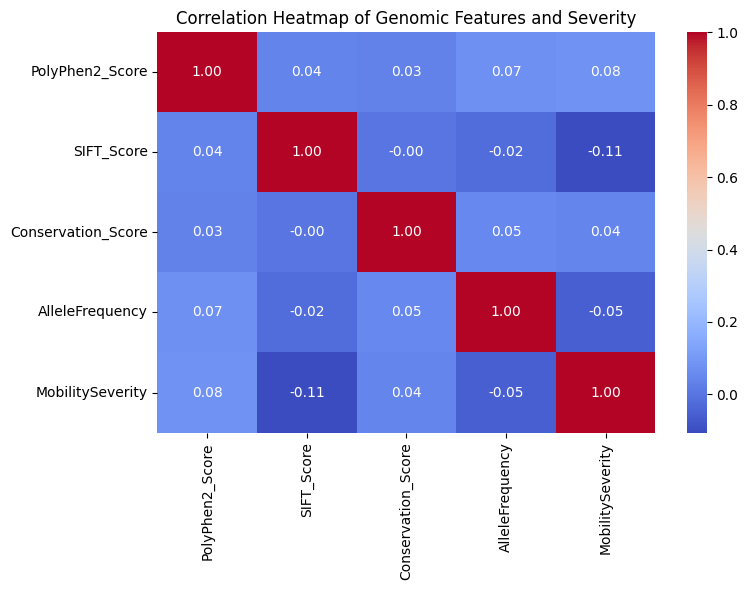

In [ ]:
# Compute correlation and create heatmap
correlation_matrix = df[[
    'PolyPhen2_Score',
    'SIFT_Score',
    'Conservation_Score',
    'AlleleFrequency',
    'MobilitySeverity'
]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Genomic Features and Severity")
plt.tight_layout()
plt.show()

Exploratory Data Analysis

In [ ]:
numerical_features = ['PolyPhen2_Score', 'SIFT_Score', 'Conservation_Score', 'AlleleFrequency', 'MobilitySeverity']
categorical_features = ['Gene', 'MutationType']

Univariate EDA for numerical features

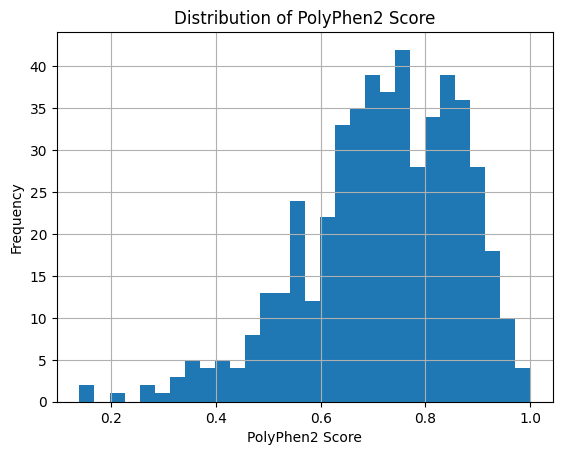

In [ ]:
df['PolyPhen2_Score'].hist(bins=30)
plt.title('Distribution of PolyPhen2 Score')
plt.xlabel('PolyPhen2 Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['PolyPhen2_Score'].describe()

,PolyPhen2_Score
count,502.000000
mean,0.717550
std,0.149992
min,0.140000
25%,0.630000
50%,0.730000
75%,0.830000
max,1.000000


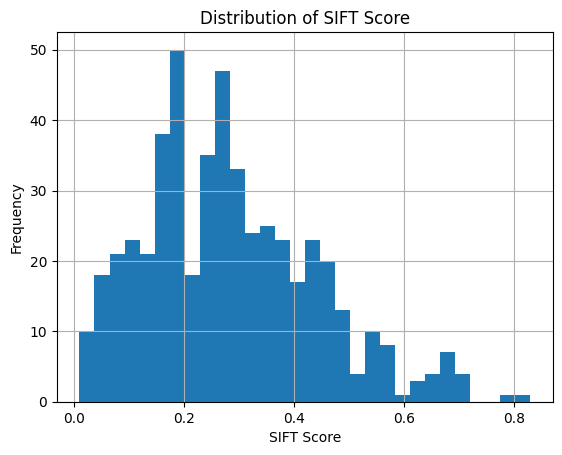

In [ ]:
df['SIFT_Score'].hist(bins=30)
plt.title('Distribution of SIFT Score')
plt.xlabel('SIFT Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['SIFT_Score'].describe()

,SIFT_Score
count,502.000000
mean,0.283406
std,0.155064
min,0.010000
25%,0.170000
50%,0.270000
75%,0.380000
max,0.830000


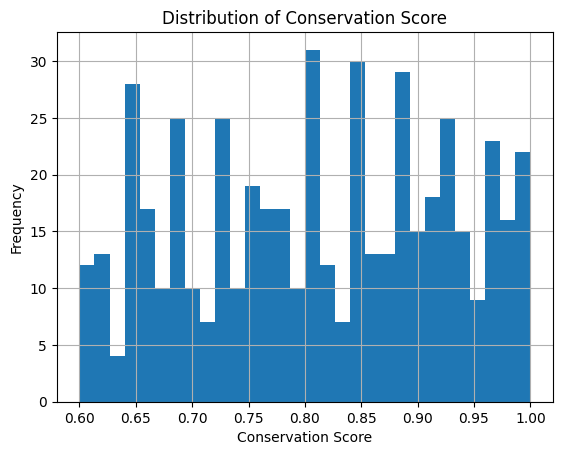

In [ ]:
df['Conservation_Score'].hist(bins=30)
plt.title('Distribution of Conservation Score')
plt.xlabel('Conservation Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Conservation_Score'].describe()

,Conservation_Score
count,502.000000
mean,0.809661
std,0.113713
min,0.600000
25%,0.712500
50%,0.810000
75%,0.910000
max,1.000000


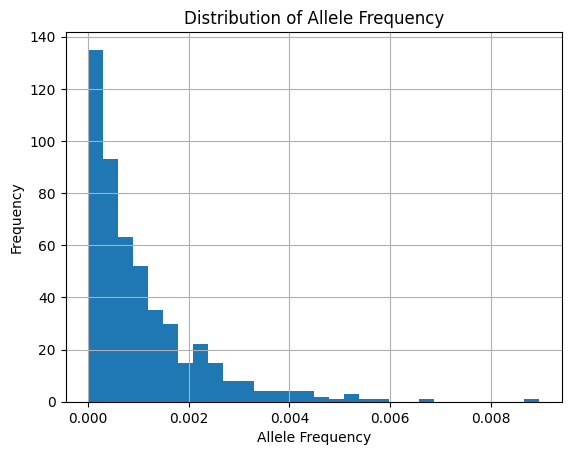

In [ ]:
df['AlleleFrequency'].hist(bins=30)
plt.title('Distribution of Allele Frequency')
plt.xlabel('Allele Frequency')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['AlleleFrequency'].describe()

,AlleleFrequency
count,502.000000
mean,0.001071
std,0.001151
min,0.000000
25%,0.000270
50%,0.000690
75%,0.001437
max,0.008960


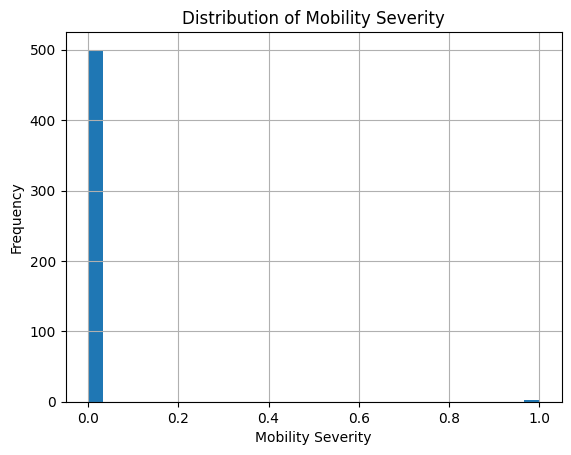

In [ ]:
df['MobilitySeverity'].hist(bins=30)
plt.title('Distribution of Mobility Severity')
plt.xlabel('Mobility Severity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['MobilitySeverity'].describe()

,MobilitySeverity
count,502.000000
mean,0.003984
std,0.063056
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Univariate EDA for categorical features

In [ ]:
categorical_features

['Gene', 'MutationType']

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
count

,count
Gene,
PIEZO2,240
TPM2,153
TNNT3,109


In [ ]:
percent = 100*df[feature].value_counts(normalize=True)
percent

,proportion
Gene,
PIEZO2,47.808765
TPM2,30.478088
TNNT3,21.713147


In [ ]:
gene_counts_df = pd.DataFrame({'count': count, 'percent': percent.round(1)})
print(gene_counts_df)

        count  percent
Gene                  
PIEZO2    240     47.8
TPM2      153     30.5
TNNT3     109     21.7


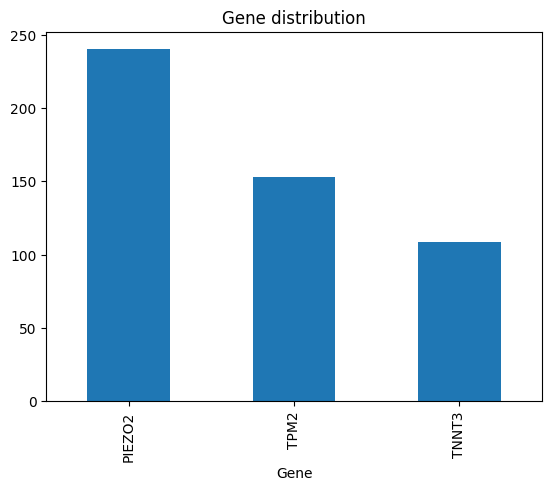

In [ ]:
count.plot(kind='bar', title=f'{feature} distribution')
plt.show()

Bivariate EDA

## Bivariate eda for numerical features



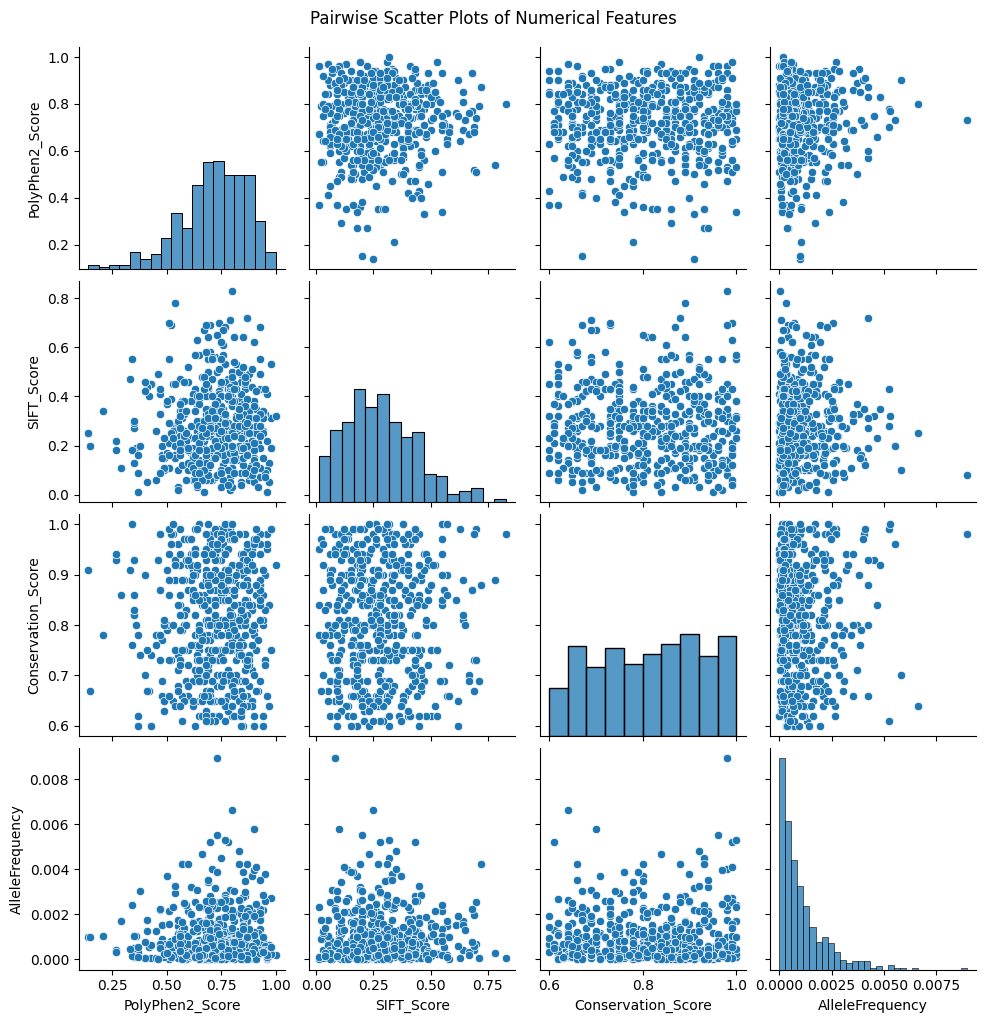

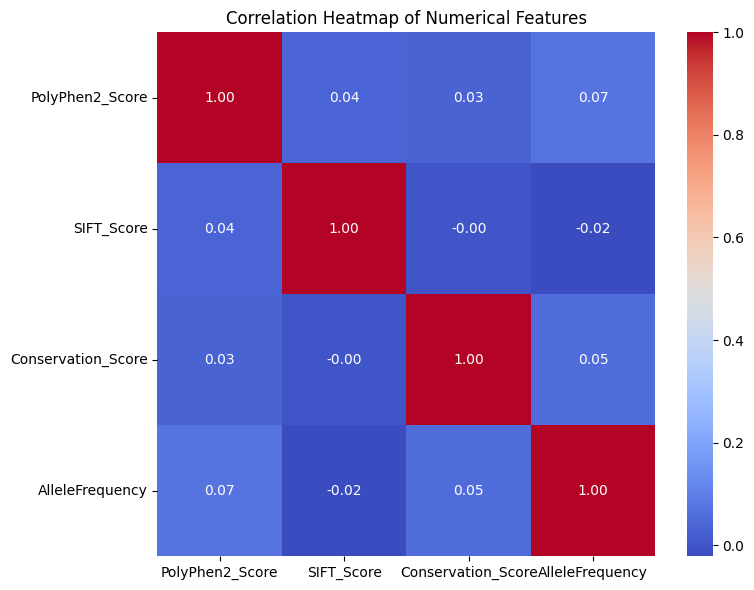

In [ ]:
# Create pairwise scatter plots
sns.pairplot(df[numerical_features])
plt.suptitle('Pairwise Scatter Plots of Numerical Features', y=1.02)
plt.show()

# Compute and display correlation matrix
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

## Bivariate eda for categorical features


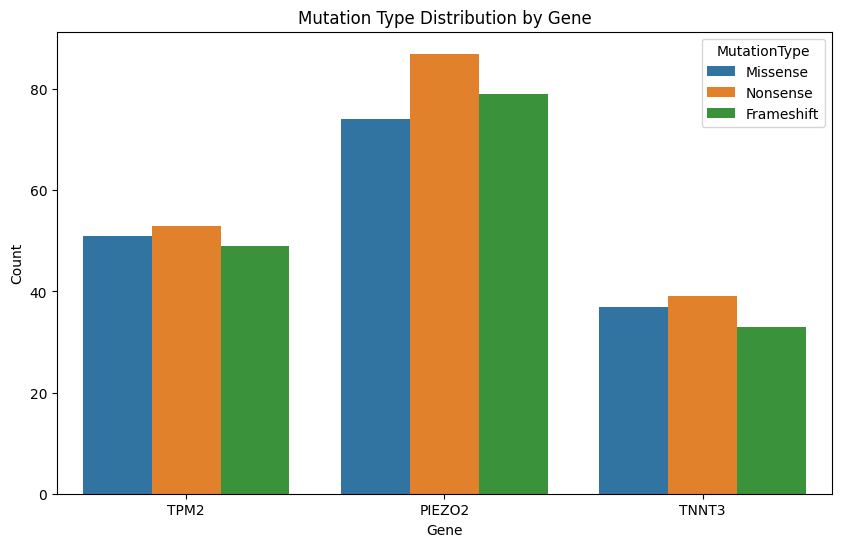

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gene', hue='MutationType')
plt.title('Mutation Type Distribution by Gene')
plt.xlabel('Gene')
plt.ylabel('Count')
plt.show()

## Bivariate eda for numerical and categorical features




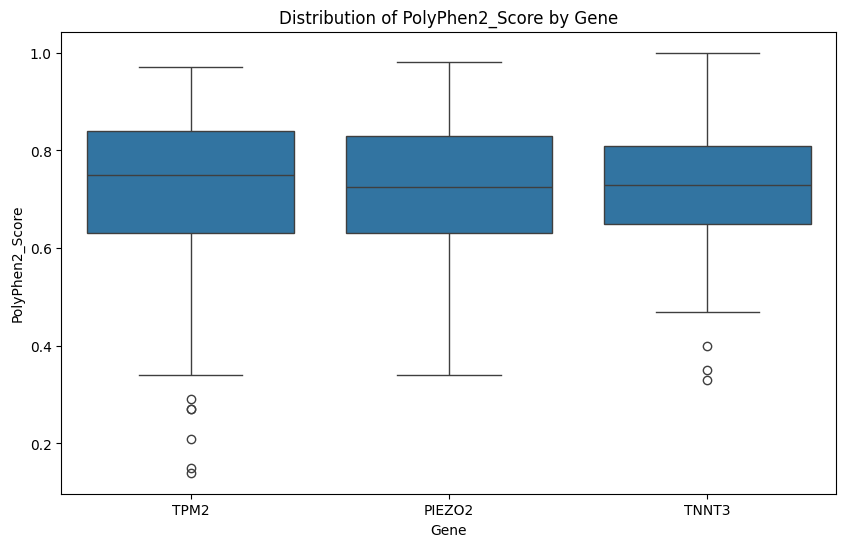

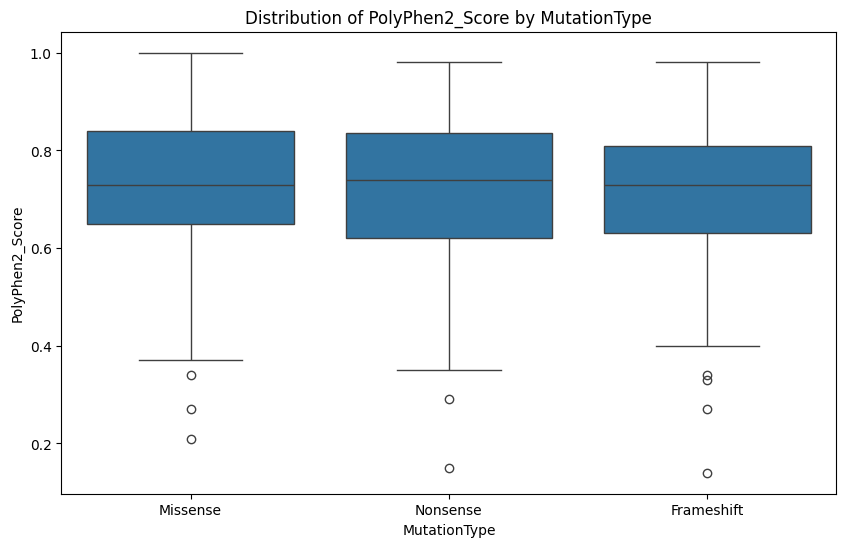

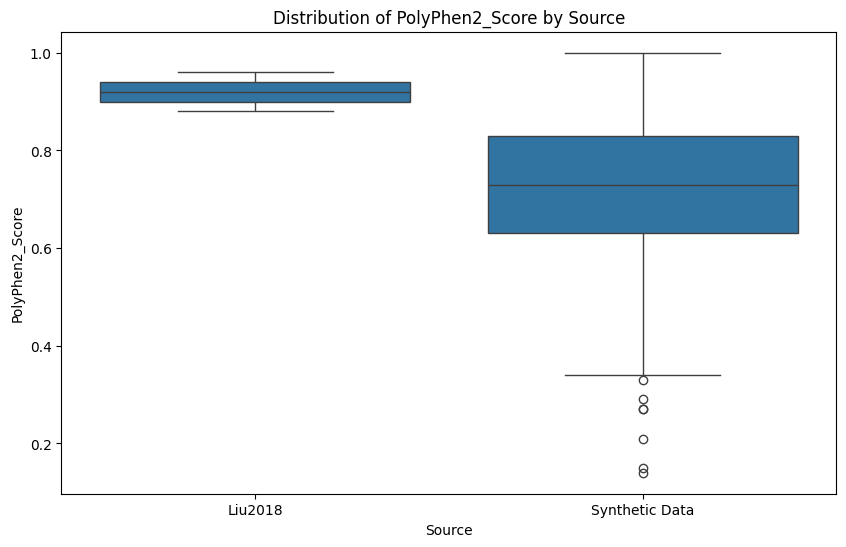

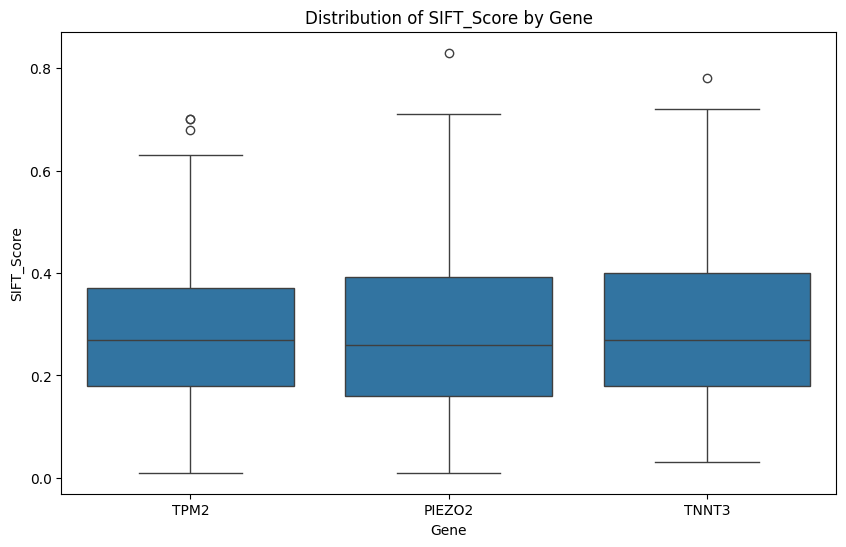

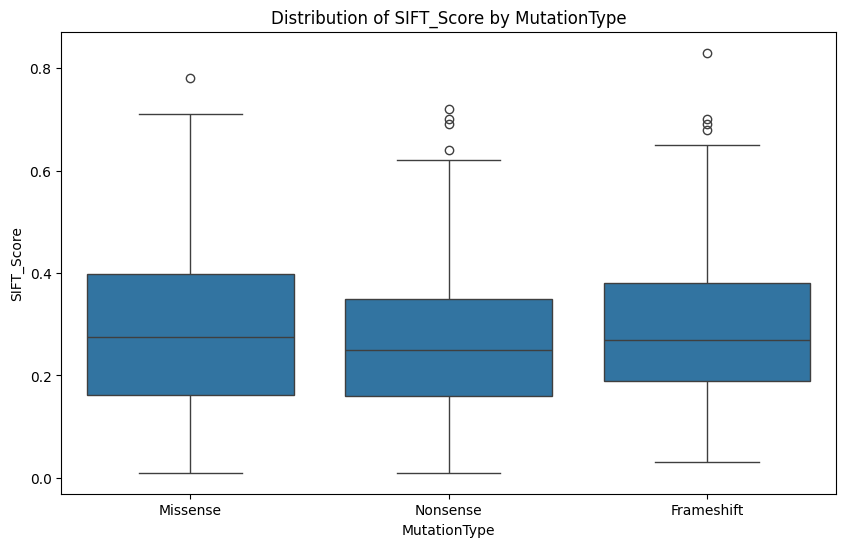

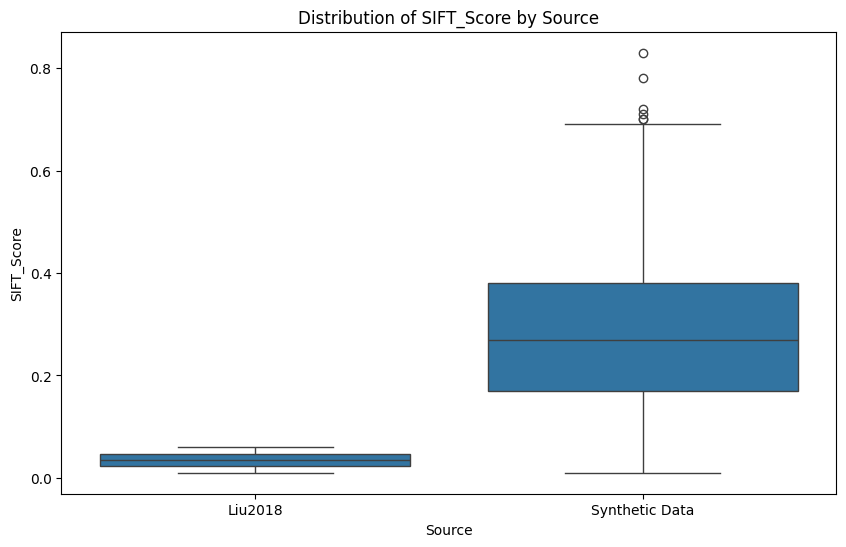

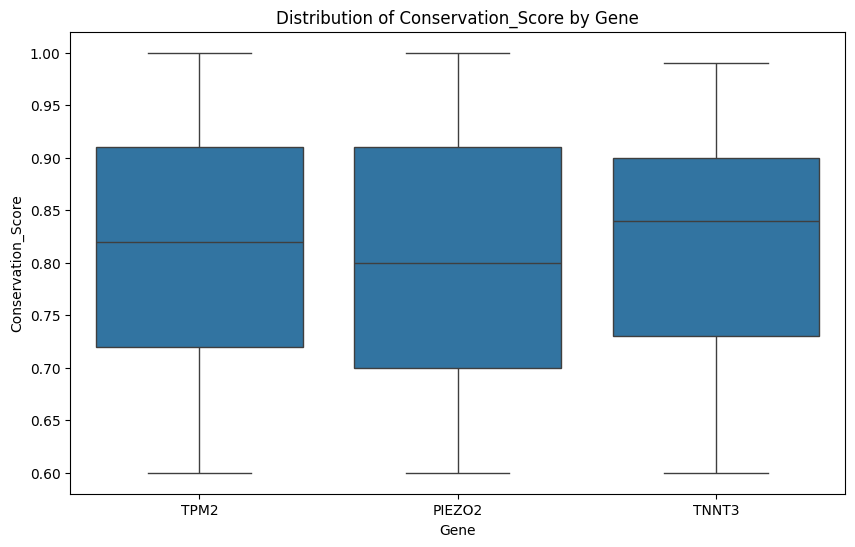

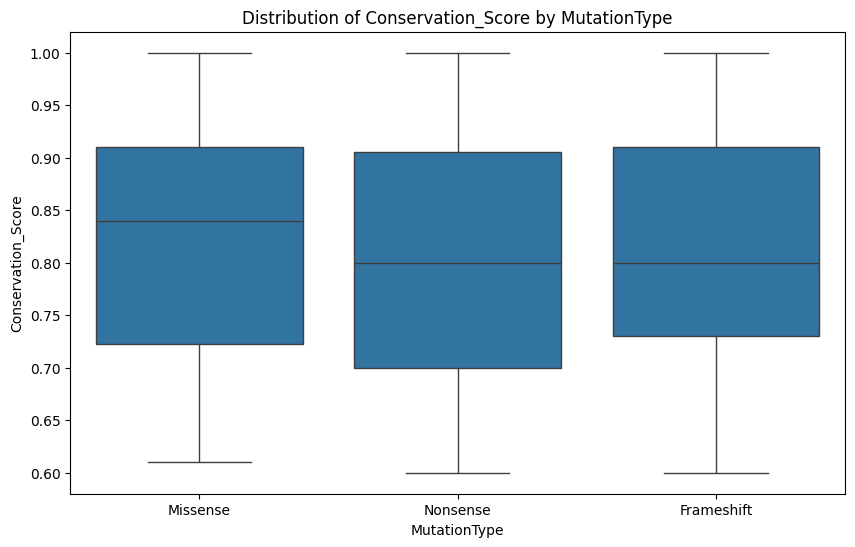

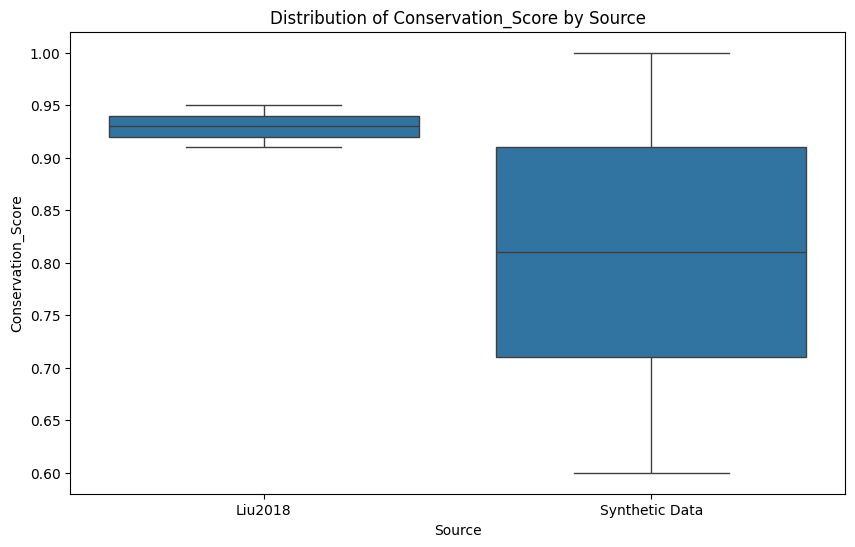

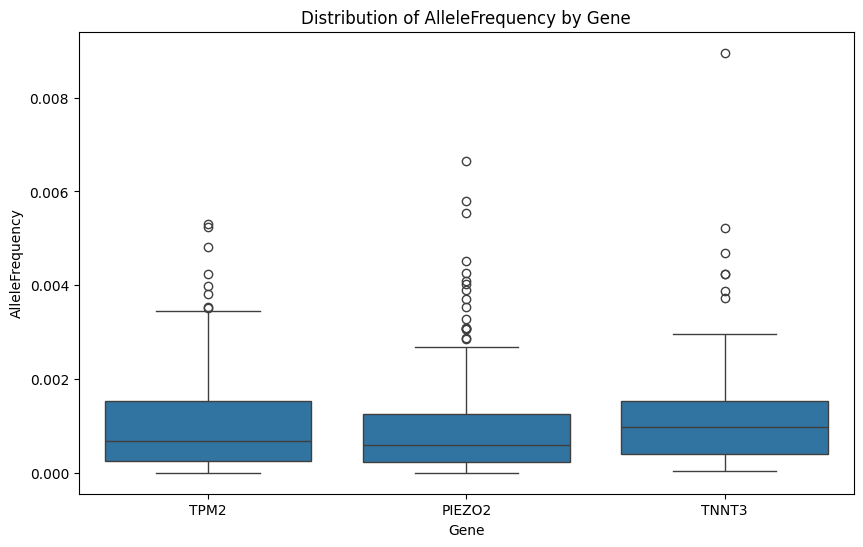

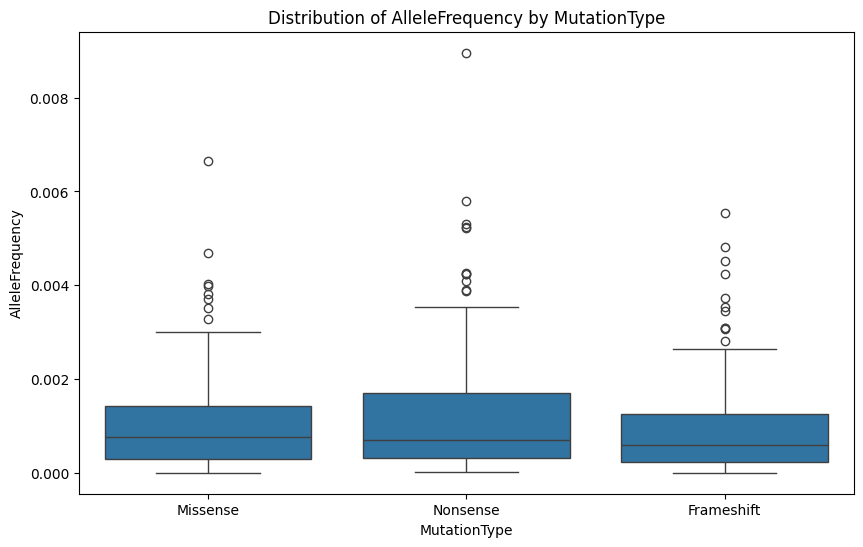

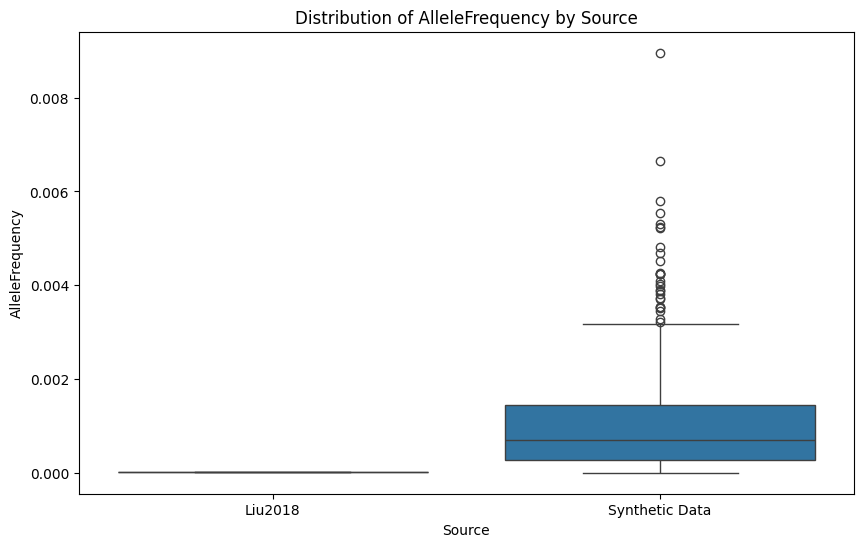

In [ ]:
numerical_features = ['PolyPhen2_Score', 'SIFT_Score', 'Conservation_Score', 'AlleleFrequency']
categorical_features = ['Gene', 'MutationType', 'Source']

for num_feature in numerical_features:
    for cat_feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=cat_feature, y=num_feature)
        plt.title(f'Distribution of {num_feature} by {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.show()

## Summary:

### Data Analysis Key Findings

*   Pairwise scatter plots and a correlation heatmap were generated for numerical features, providing a visual and quantitative assessment of their relationships.
*   A countplot was successfully created to visualize the distribution of 'MutationType' across different 'Gene' categories.
*   Box plots were generated for all combinations of the four numerical features ('PolyPhen2\_Score', 'SIFT\_Score', 'Conservation\_Score', 'AlleleFrequency') and the three categorical features ('Gene', 'MutationType', 'Source'), illustrating the distribution of numerical values within each category.




In [ ]:
# Calculate the class distribution of 'MobilitySeverity'
mobility_severity_counts = df['MobilitySeverity'].value_counts()
mobility_severity_percentages = df['MobilitySeverity'].value_counts(normalize=True) * 100

# Create a DataFrame for better display
mobility_severity_distribution = pd.DataFrame({
    'Count': mobility_severity_counts,
    'Percentage': mobility_severity_percentages.round(2)
})

print("Class Distribution of MobilitySeverity:")
display(mobility_severity_distribution)

Class Distribution of MobilitySeverity:


,Count,Percentage
MobilitySeverity,,
0,500,99.6
1,2,0.4


In [ ]:
# Save the dataframe to a CSV file
df.to_csv('final_feature_table.csv', index=False)

In [ ]:
# Download the CSV file
from google.colab import files
files.download('final_feature_table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>